In [3]:
# Importing the  libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Reading the dataset 
df = pd.read_csv('hour.csv')

# Handle missing values for numeric columns by filling them in with the column mean
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Converting the categorical variables into numeric values - one-hot encoding
df = pd.get_dummies(df, columns=['season', 'weekday', 'weathersit'], drop_first=True)

# Converting  'dteday' to datetime format for model readblity
df['dteday'] = pd.to_datetime(df['dteday'])

# Feature scaling for the numerical columns
scaler = StandardScaler()
df[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(df[['temp', 'atemp', 'hum', 'windspeed']])


In [5]:
# Assign the target variable and features
X = df.drop(columns=['cnt', 'dteday'])  # Drop target variable and date column
y = df['cnt']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making the predictions from the model
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Model to see the accuracy of the MSE RMSE and Rsquared
mse_lr = mean_squared_error(y_test, y_pred_lr)  # MSE
rmse_lr = np.sqrt(mse_lr)  # RMSE
r2_lr = r2_score(y_test, y_pred_lr)  # R-squared

# Displaying Evaluation Metrics to see accuracy
print("Linear Regression Results:")
print(f'Mean Squared Error: {mse_lr}')
print(f'Root Mean Squared Error: {rmse_lr}')
print(f'R-squared: {r2_lr}')


Linear Regression Results:
Mean Squared Error: 8.1814013267920495e-22
Root Mean Squared Error: 2.8603148999353286e-11
R-squared: 1.0


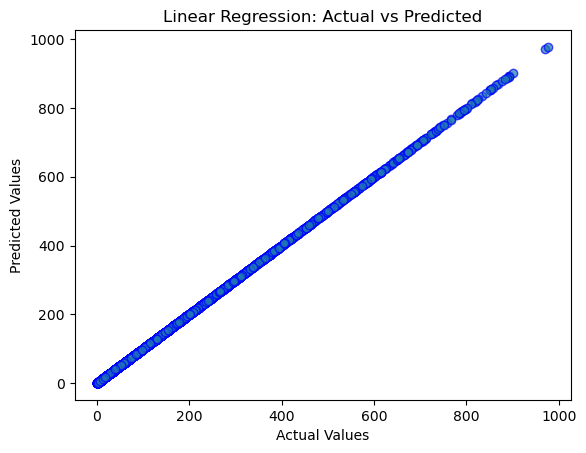

In [9]:
# Visual graph for Actual vs Predicted Values
plt.scatter(y_test, y_pred_lr, alpha=0.7, edgecolors='b')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


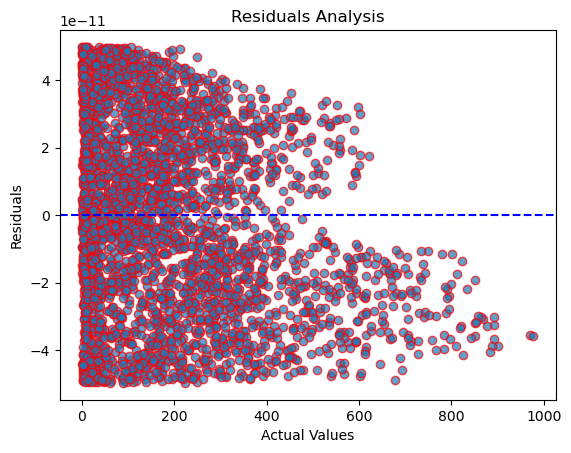

In [11]:
# Visual graph for residual analysis
residuals = y_test - y_pred_lr
plt.scatter(y_test, residuals, alpha=0.7, edgecolors='r')
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Analysis')
plt.show()


In [13]:
# Displaying relevant features of the Linear Model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)



Feature Coefficients:
         Feature   Coefficient
11    registered  1.000000e+00
10        casual  1.000000e+00
1             yr  3.614886e-13
2           mnth  2.090208e-14
8            hum  1.140064e-14
0        instant  5.687495e-15
13      season_3  2.137091e-15
7          atemp  1.518100e-15
12      season_2  1.410813e-15
3             hr  1.062720e-15
14      season_4  9.852993e-16
9      windspeed  4.294800e-16
22  weathersit_3 -5.609662e-16
20     weekday_6 -5.868761e-16
21  weathersit_2 -1.158145e-15
23  weathersit_4 -1.283729e-15
16     weekday_2 -8.025657e-15
17     weekday_3 -8.550886e-15
15     weekday_1 -8.903273e-15
19     weekday_5 -9.213360e-15
18     weekday_4 -9.511020e-15
5     workingday -1.342352e-14
6           temp -2.704309e-14
4        holiday -3.077256e-14


In [15]:
from sklearn.model_selection import cross_val_score

# Performing to cross-validation see how valid the predictions are 
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

#Displaying the results for validation
print("\nCross-Validation Results ")
print(f'Mean Cross-Validation RMSE - {cv_rmse.mean()}')
print(f'Individual RMSEs - {cv_rmse}')



Cross-Validation Results - 
Mean Cross-Validation RMSE - 7.482207574846647e-12
Individual RMSEs - [7.03596215e-13 2.46980362e-11 3.24779263e-12 8.56854118e-12
 1.93071634e-13]
